# Seaborn: Create correlation matrix heatmap

---
* author:  [Prasert Kanawattanachai](prasert.k@chula.ac.th)
* YouTube: https://www.youtube.com/prasertcbs
* [Chulalongkorn Business School](https://www.cbs.chula.ac.th/en/)
---

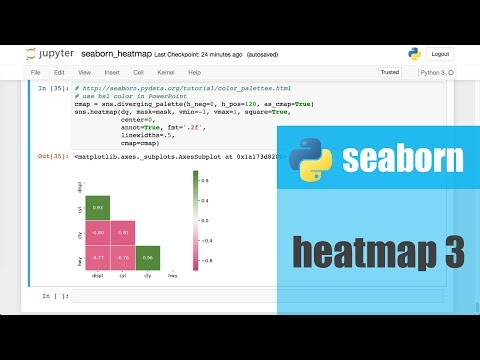

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('uwbpf7CFzyw', width=720, height=405)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
print(f"pandas  version = {pd.__version__}")
print(f"seaborn version = {sns.__version__}")
print(f"numpy   version = {np.__version__}")

pandas  version = 0.25.3
seaborn version = 0.9.0
numpy   version = 1.17.4


In [4]:
url='https://github.com/prasertcbs/tutorial/raw/master/mpg.csv'
df=pd.read_csv(url)
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [5]:
df['gear']=df.trans.str[0].map({'a':'auto', 'm':'manual'}).astype("category")
df['drv']=df.drv.map({'f':'front', 'r':'rear', '4':'4-wheel'}).astype('category')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,gear
0,audi,a4,1.8,1999,4,auto(l5),front,18,29,p,compact,auto
1,audi,a4,1.8,1999,4,manual(m5),front,21,29,p,compact,manual
2,audi,a4,2.0,2008,4,manual(m6),front,20,31,p,compact,manual
3,audi,a4,2.0,2008,4,auto(av),front,21,30,p,compact,auto
4,audi,a4,2.8,1999,6,auto(l5),front,16,26,p,compact,auto


In [6]:
df.corr()

,displ,year,cyl,cty,hwy
displ,1.000000,0.147843,0.930227,-0.798524,-0.766020
year,0.147843,1.000000,0.122245,-0.037232,0.002158
cyl,0.930227,0.122245,1.000000,-0.805771,-0.761912
cty,-0.798524,-0.037232,-0.805771,1.000000,0.955916
hwy,-0.766020,0.002158,-0.761912,0.955916,1.000000


In [7]:
df[['displ', 'cyl', 'cty', 'hwy']][df.year==1999].corr()

,displ,cyl,cty,hwy
displ,1.000000,0.925097,-0.782667,-0.780395
cyl,0.925097,1.000000,-0.755072,-0.724974
cty,-0.782667,-0.755072,1.000000,0.950809
hwy,-0.780395,-0.724974,0.950809,1.000000


In [8]:
dg=df[['displ', 'cyl', 'cty', 'hwy']].corr()
dg

,displ,cyl,cty,hwy
displ,1.000000,0.930227,-0.798524,-0.766020
cyl,0.930227,1.000000,-0.805771,-0.761912
cty,-0.798524,-0.805771,1.000000,0.955916
hwy,-0.766020,-0.761912,0.955916,1.000000


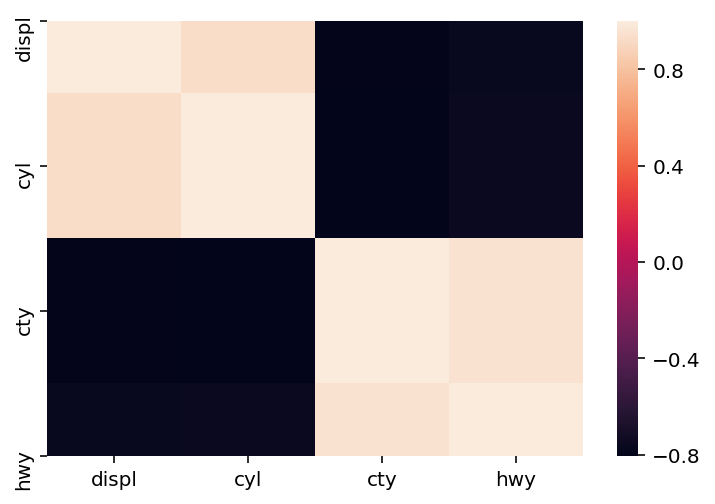

In [9]:
sns.heatmap(dg)

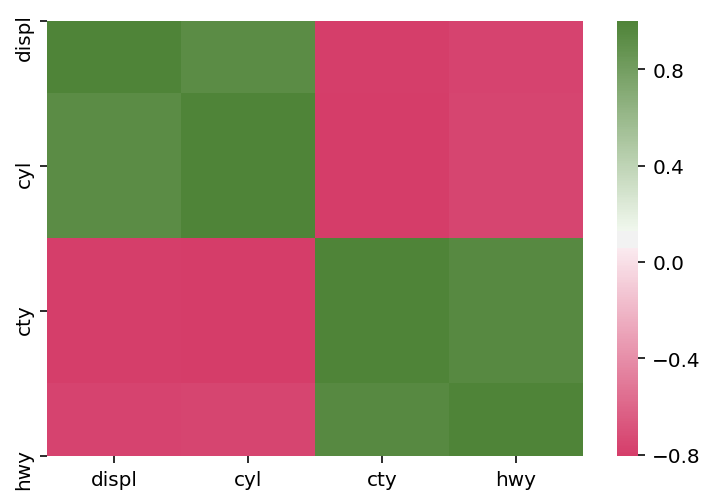

In [10]:
cmap = sns.diverging_palette(h_neg=0, h_pos=120, as_cmap=True)
sns.heatmap(dg,
            cmap=cmap)

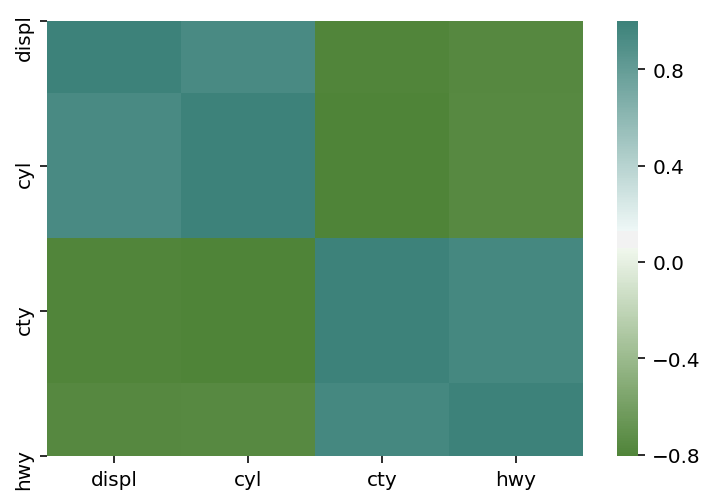

In [11]:
cmap = sns.diverging_palette(h_neg=120, h_pos=180, as_cmap=True)
sns.heatmap(dg,
            cmap=cmap)

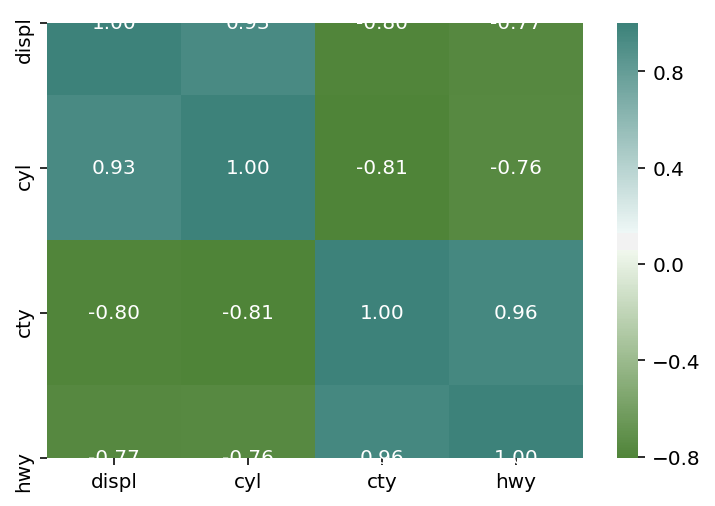

In [12]:
cmap = sns.diverging_palette(h_neg=120, h_pos=180, as_cmap=True)
sns.heatmap(dg,
            cmap=cmap,
            annot=True, fmt='.2f')

In [13]:
dg

,displ,cyl,cty,hwy
displ,1.000000,0.930227,-0.798524,-0.766020
cyl,0.930227,1.000000,-0.805771,-0.761912
cty,-0.798524,-0.805771,1.000000,0.955916
hwy,-0.766020,-0.761912,0.955916,1.000000


In [14]:
mask = np.zeros_like(dg)
mask

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [15]:
mask[np.triu_indices_from(mask)] = True
mask

array([[1., 1., 1., 1.],
       [0., 1., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 1.]])

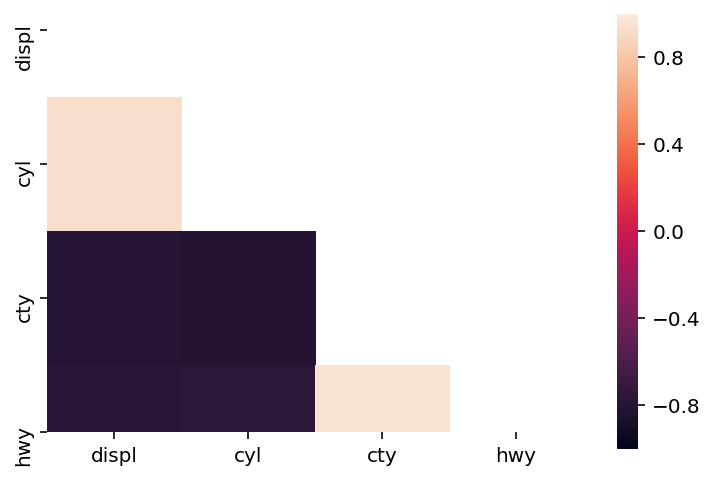

In [16]:
sns.heatmap(dg, mask=mask, vmin=-1, vmax=1, square=True)

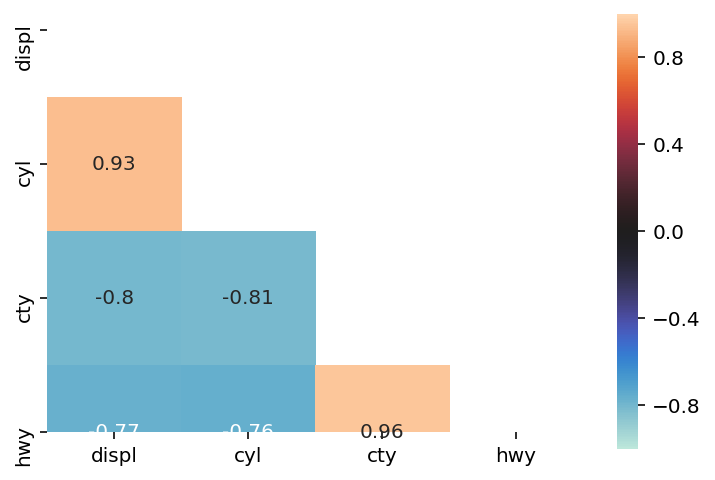

In [17]:
sns.heatmap(dg, mask=mask, vmin=-1, vmax=1, square=True,
            center=0,
            annot=True)

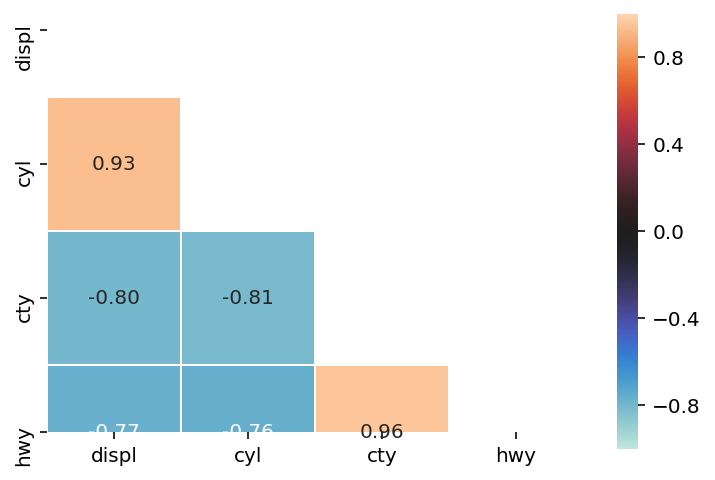

In [18]:
sns.heatmap(dg, mask=mask, vmin=-1, vmax=1, square=True,
            center=0,
            annot=True,
            fmt='.2f',
            linewidths=.5)

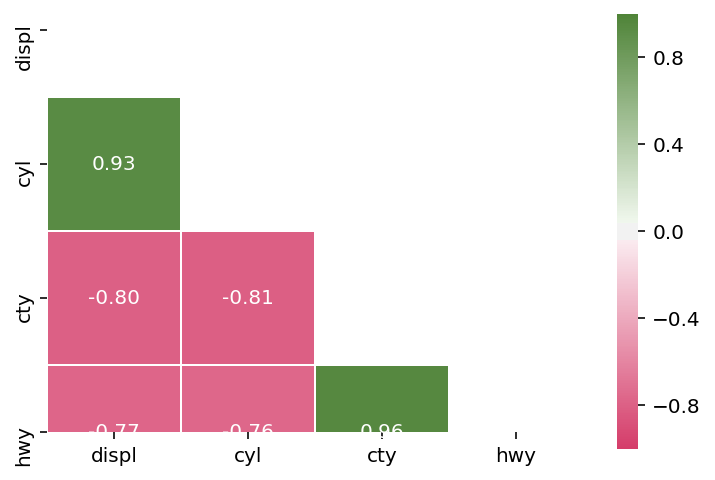

In [19]:
# http://seaborn.pydata.org/tutorial/color_palettes.html
# use hsl color in PowerPoint 
cmap = sns.diverging_palette(h_neg=0, h_pos=120, as_cmap=True)
sns.heatmap(dg, mask=mask, vmin=-1, vmax=1, square=True,
            center=0,
            annot=True, fmt='.2f',
            linewidths=.5,
            cmap=cmap)